In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.datasets import load_boston
from string import ascii_letters
import scipy.stats as ss
%matplotlib inline

In [6]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston['MEDV'] = boston_dataset.target #Add the MEDV to the dataset

In [9]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


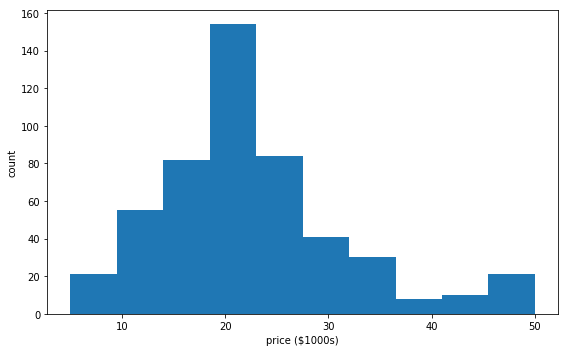

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [13]:
import sklearn.linear_model as lm

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


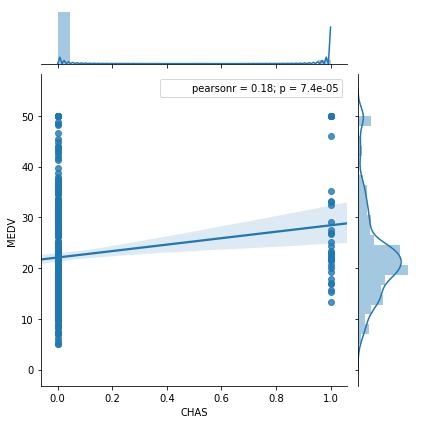

In [26]:
sns.jointplot(x='CHAS', y='MEDV', data=boston, kind='reg');
plt.show()

In [27]:
coor_matrix = boston.corr()

In [28]:
coor_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [29]:
coor_matrix['CHAS'].sort_values(ascending=False)

CHAS       1.000000
MEDV       0.175260
RM         0.091251
NOX        0.091203
AGE        0.086518
INDUS      0.062938
B          0.048788
RAD       -0.007368
TAX       -0.035587
ZN        -0.042697
LSTAT     -0.053929
CRIM      -0.055295
DIS       -0.099176
PTRATIO   -0.121515
Name: CHAS, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F38A9E8>,
      dtype=object)

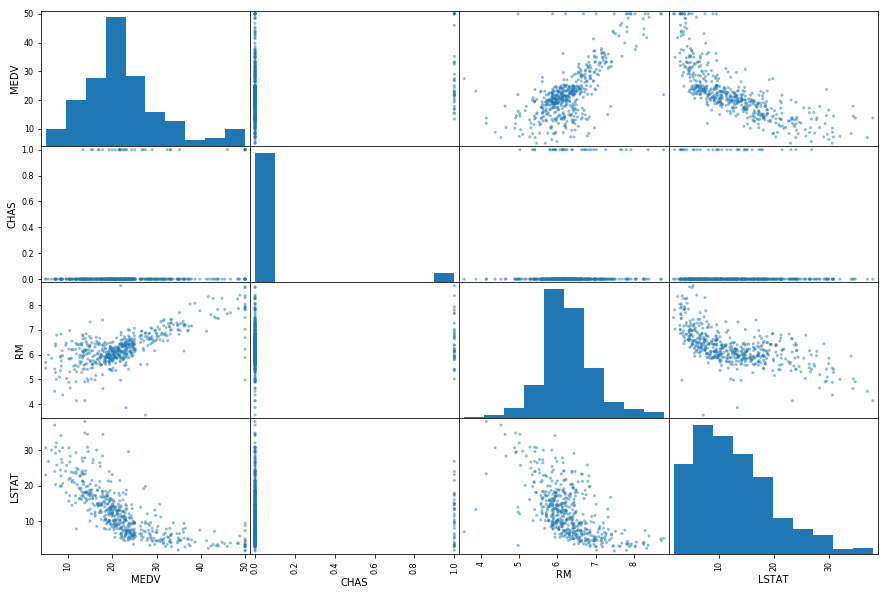

In [32]:
attributes = ["MEDV", "CHAS", "RM", "LSTAT"]
scatter_matrix(boston[attributes], figsize=(15, 10))

In [35]:
df = pd.DataFrame(boston_dataset.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [37]:
df['MEDV'] = boston_dataset.target

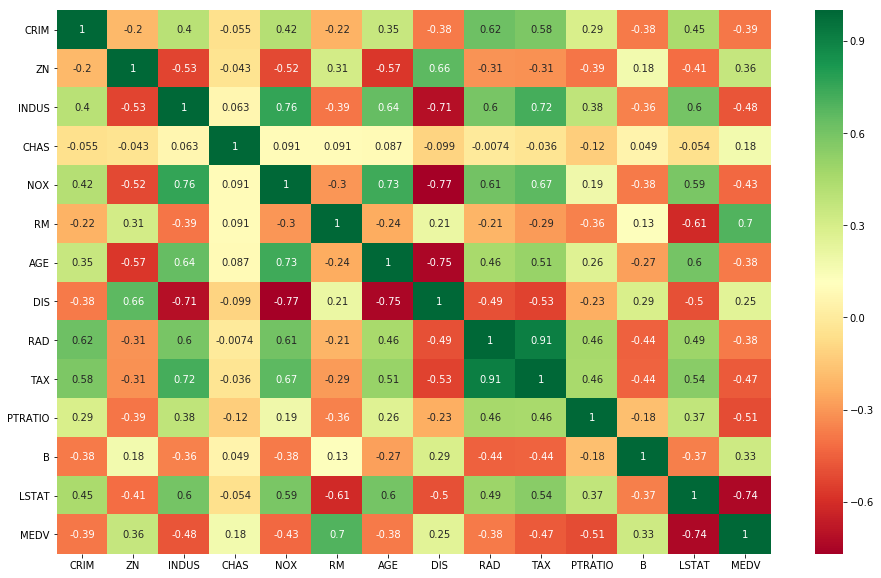

In [38]:
ax, fig = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001073F780>,
      dtype=object)

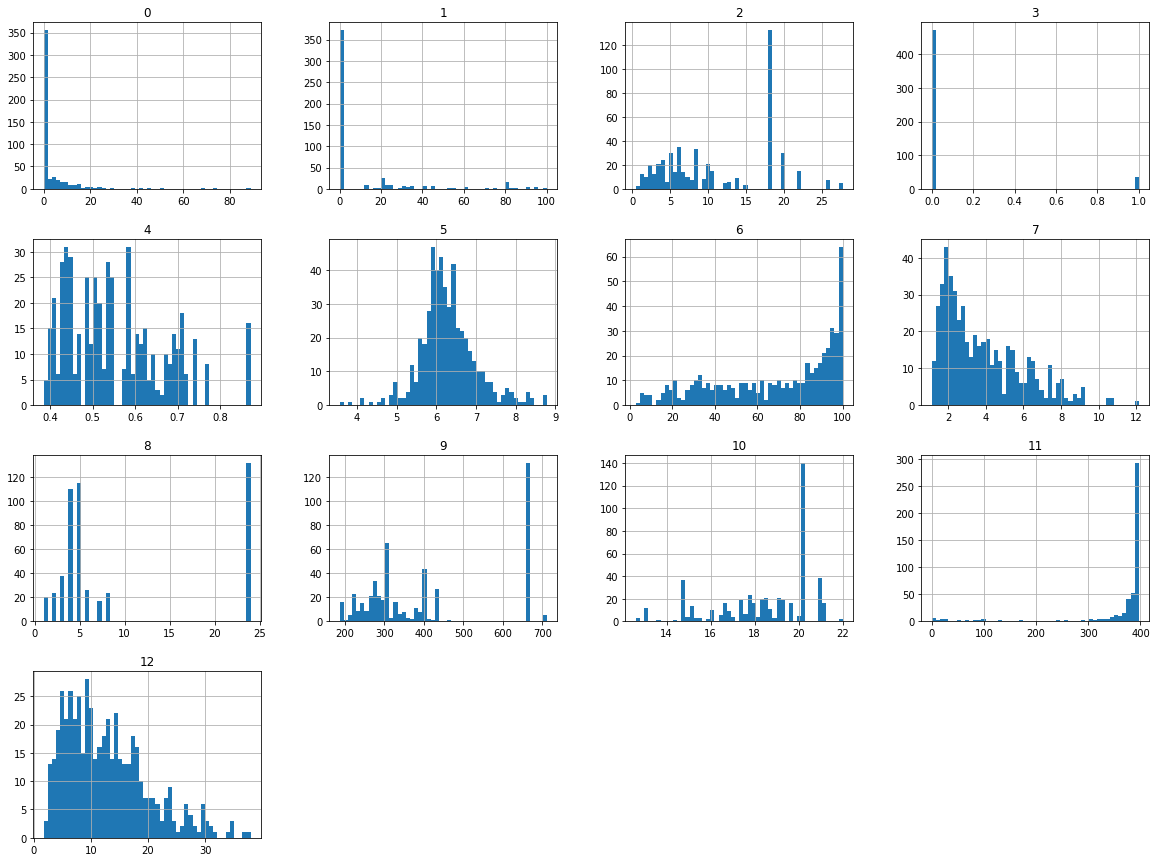

In [40]:
pd.DataFrame(boston_dataset['data']).hist(bins = 50, figsize = (20, 15))

In [42]:
ss.ttest_ind

<function scipy.stats.stats.ttest_ind>

In [46]:
r = boston['CHAS']

In [47]:
p = boston['MEDV']

In [48]:
ss.ttest_ind(r, p)

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


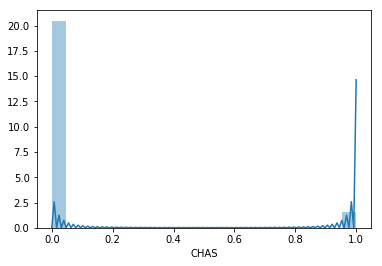

In [49]:
sns.distplot(r)

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


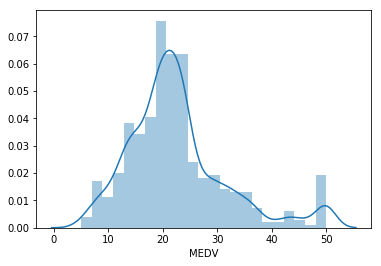

In [50]:
sns.distplot(p)

In [51]:
boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64